In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

##### Observações
- Serão feitos testes com número de componentes igual a 2
- Serão feitos testes com número de componentes igual a 3
- Não foi possível fazer testes com número de componentes igual a 20 (mesmo mudando o mtipo de método passado para o TSNE) - muito lento.

### Leitura de dados

In [2]:
df = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [3]:
df_scaled = df.drop(['no_curso','co_curso'],axis=1)

### Definição métodos TSNE

In [4]:
barnes_hut = 'barnes_hut'
exact = 'exact'

### Funções

In [5]:
def plotar_grafico_perplexity(n_components, method):
    #Escolhendo perplexity
    perplexity = np.arange(5, 55, 5)
    divergence = []
    
    for i in perplexity:
        model = TSNE(n_components=n_components, init="pca", perplexity=i, method=method)
        reduced = model.fit_transform(df_scaled)
        divergence.append(model.kl_divergence_)
    
    # Criar o gráfico com matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(perplexity, divergence, marker='o', color='red', linewidth=1, label='Divergence')
    plt.title("Divergence vs Perplexity", fontsize=16)
    plt.xlabel("Perplexity Values", fontsize=14)
    plt.ylabel("Divergence", fontsize=14)
    plt.grid(alpha=0.5)
    plt.legend(fontsize=12)
    plt.show()

In [6]:
def reduzir_dimensionalidade_t_sne(n_components, perplexity, method):
    #Reduzir dimensionalidade com t-SNE
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=42, method=method)
    data_tsne = tsne.fit_transform(df_scaled)

    return data_tsne

In [7]:
def aplicar_k_means(data, n_clusters):
    #Aplicar K-Means no espaço reduzido
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)

    return kmeans

In [8]:
def visualizar_silhueta_k_means(kmeans, data):
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.show()

In [9]:
def visualizar_clusters(kmeans, data, n_clusters):
    #Visualizar os clusters
    clusters = kmeans.predict(data)
    
    plt.figure(figsize=(10, 6))
    for i in range(n_clusters):
        plt.scatter(data[clusters == i, 0], data[clusters == i, 1], label=f'Cluster {i}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centroides')
    plt.title('Clusters com t-SNE + K-Means')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.show()

### n_componentes = 2

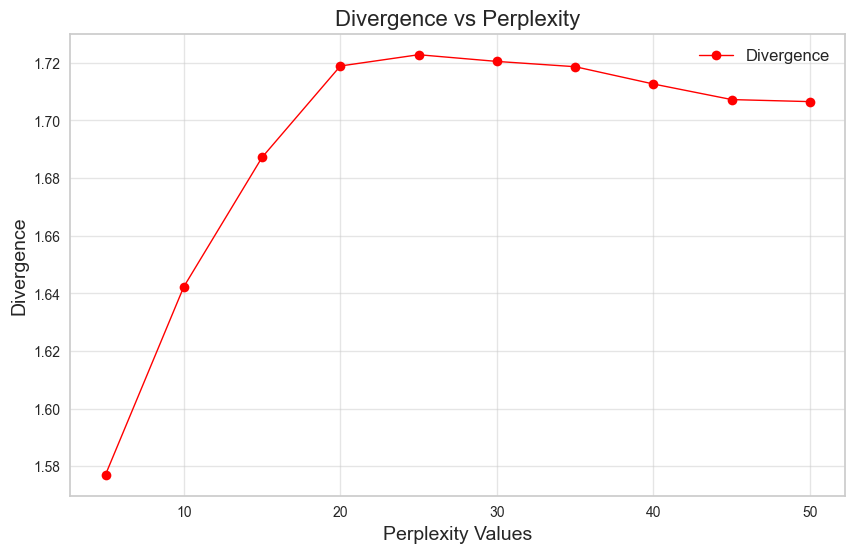

In [10]:
plotar_grafico_perplexity(2, barnes_hut)

In [11]:
data = reduzir_dimensionalidade_t_sne(2, 40, barnes_hut)

In [12]:
kmeans = aplicar_k_means(data, 5)

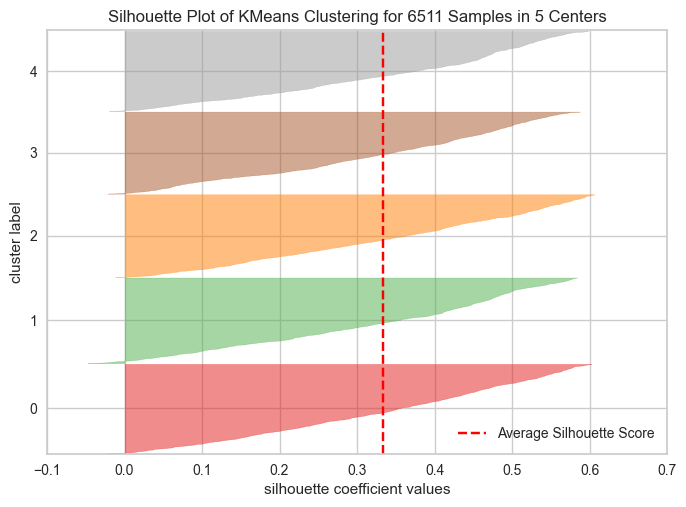

In [13]:
visualizar_silhueta_k_means(kmeans, data)

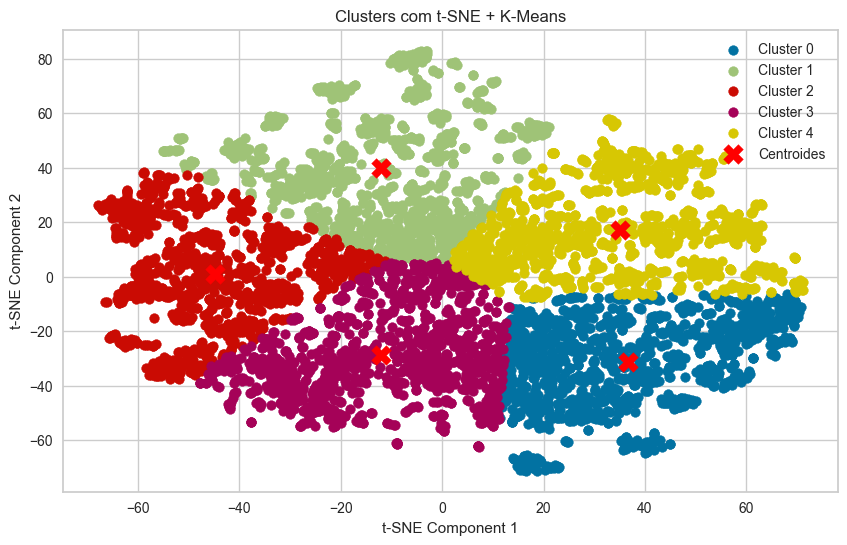

In [14]:
visualizar_clusters(kmeans, data, 5)

### n_componentes = 3

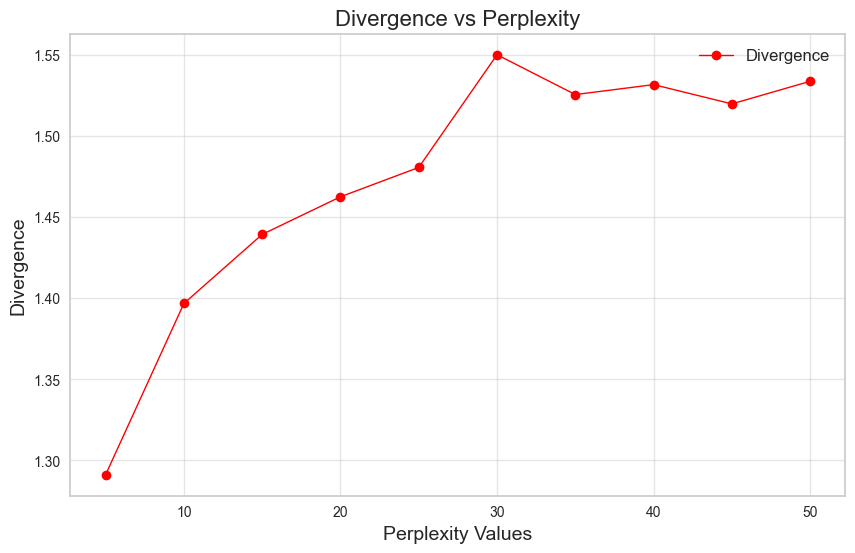

In [15]:
plotar_grafico_perplexity(3, barnes_hut)

In [16]:
data = reduzir_dimensionalidade_t_sne(3, 40, barnes_hut)

In [17]:
kmeans = aplicar_k_means(data, 5)

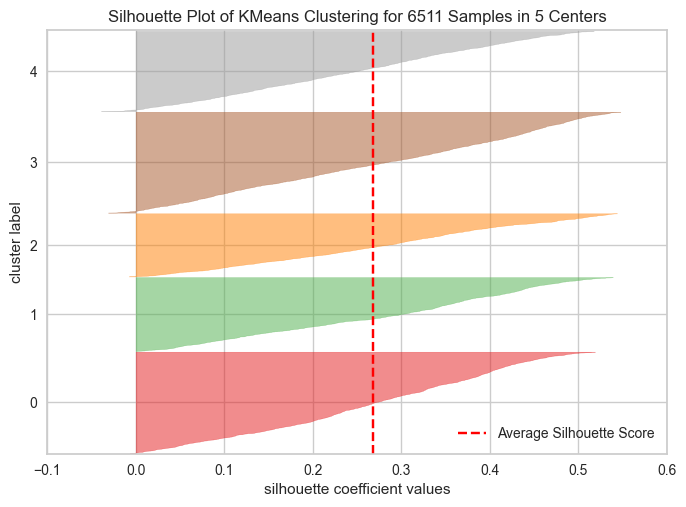

In [18]:
visualizar_silhueta_k_means(kmeans, data)

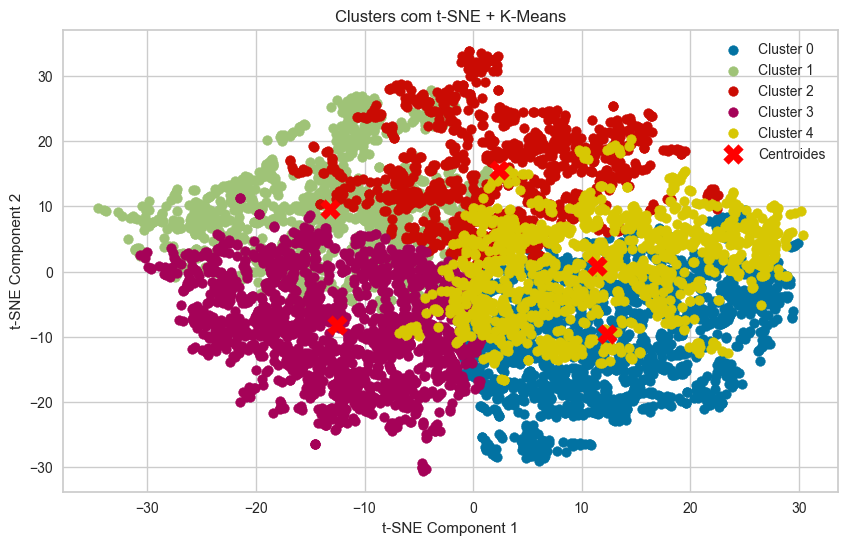

In [19]:
visualizar_clusters(kmeans, data, 5)